In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Face')

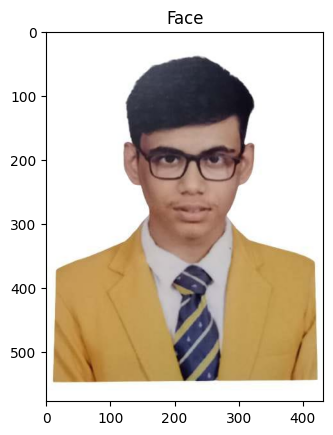

In [2]:
faceImage = cv2.imread('PHOTO.jpg')
plt.imshow(faceImage[:,:,::-1]);plt.title("Face")

In [3]:
faceImage.shape  # shape of the image 
resize_face=cv2.resize(faceImage,(413,531))
resize_face.shape

(531, 413, 3)

Text(0.5, 1.0, 'glassJPG')

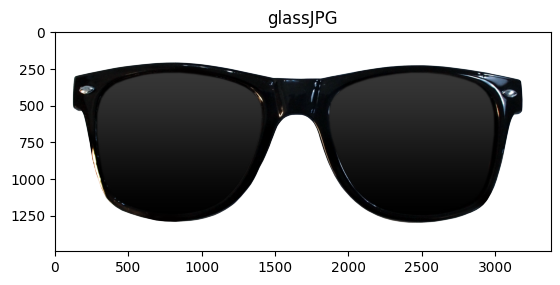

In [4]:
glassPNG = cv2.imread('sunglasses.png',-1)
plt.imshow(glassPNG);plt.title("glassJPG")

In [5]:
# Resize the image to fit over the eye region
glassPNG = cv2.resize(glassPNG,(210,70))
print("image Dimension ={}".format(glassPNG.shape))

image Dimension =(70, 210, 4)


In [6]:
# Separate the Color and alpha channels
glassBGR = glassPNG[:,:,:3]
glassMask1 = glassPNG[:,:,3]

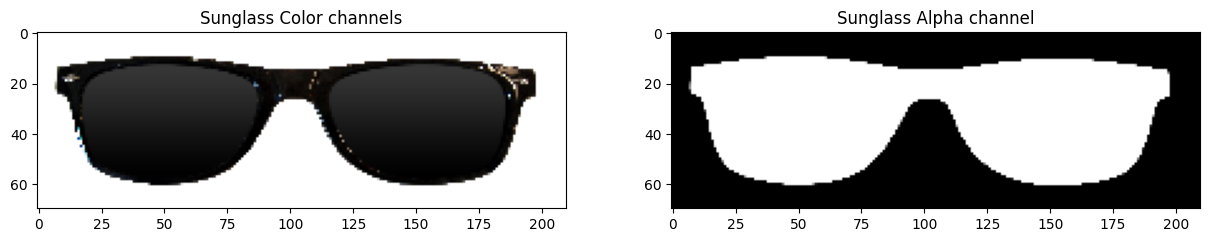

In [7]:
# Display the images for clarity
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Sunglass Alpha channel');

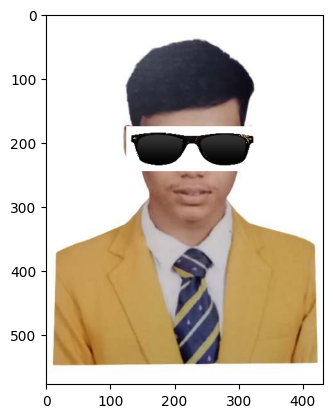

In [8]:
faceWithGlassesNaive = faceImage.copy()
# Replace the eye region with the sunglass image
faceWithGlassesNaive[175:245,125:335]=glassBGR

plt.imshow(faceWithGlassesNaive[:,:,::-1])

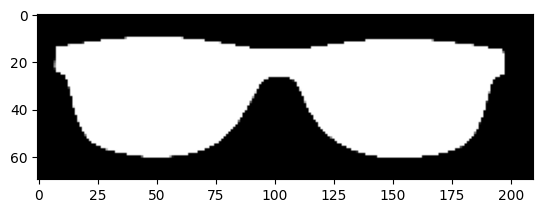

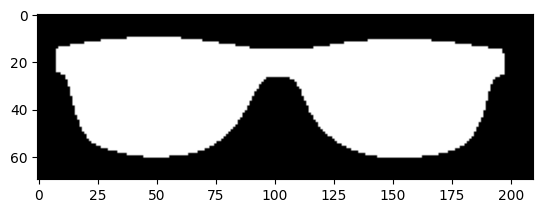

In [9]:
# Make the dimensions of the mask same as the input image. 
# Since Face Image is a 3-channel image, we create a 3 channel image for the mask 
glassMask = cv2.merge((glassMask1,glassMask1,glassMask1)) 
plt.imshow(glassMask[:,:,::-1])
plt.show()
# Make the values [0,1] since we are using arithmetic operations 
glassMask = np.uint8(glassMask/255) 
plt.imshow(glassMask*255)  # here why we are multiplying because matplotlib plots from 0 255 then the value 1 will look almost black, we can't able to visualize properly so that we multiply it with 255
plt.show()

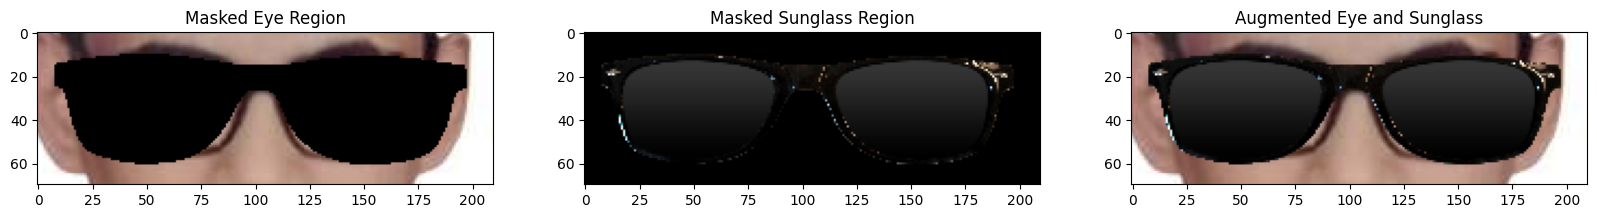

In [10]:
# Make a copy 
faceWithGlassesArithmetic = faceImage.copy() 
# Get the eye region from the face image
eyeROI= faceWithGlassesArithmetic[175:245,125:335]
# Use the mask to create the masked eye region
maskedEye = cv2.multiply(eyeROI,(1 - glassMask))
# Use the mask to create the masked sunglass region
maskedGlass = cv2.multiply(glassBGR,glassMask)

# Combine the Sunglass in the Eye Region to get the augmented image
eyeRoiFinal = cv2.add(maskedEye, maskedGlass)
# Display the intermediate results
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(maskedEye[:,:,::-1]);plt.title("Masked Eye Region")
plt.subplot(132);plt.imshow(maskedGlass[:,:,::-1]);plt.title("Masked Sunglass Region")
plt.subplot(133);plt.imshow(eyeRoiFinal[:,:,::-1]);plt.title("Augmented Eye and Sunglass")
plt.show()

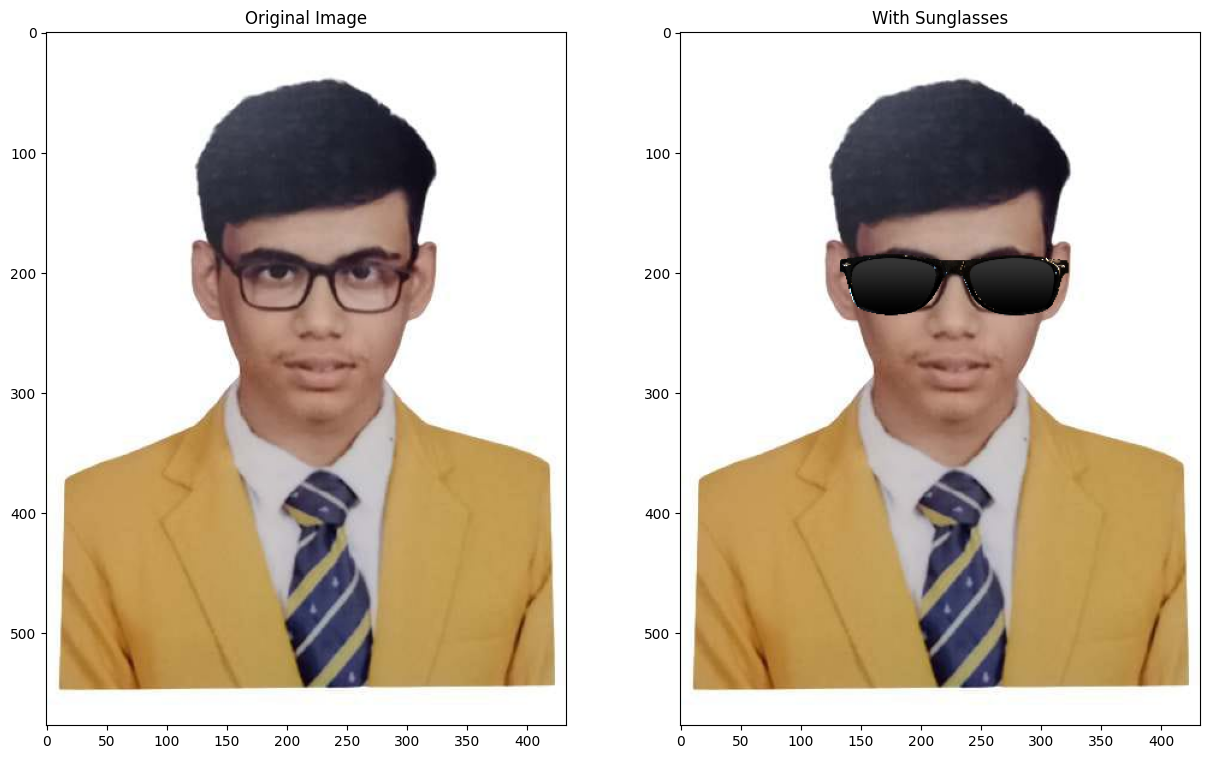

In [11]:
# Replace the eye ROI with the output from the previous section
faceWithGlassesArithmetic[175:245,125:335]=eyeRoiFinal

# Display the final result
plt.figure(figsize=[15,9]);
plt.subplot(121);plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceWithGlassesArithmetic[:,:,::-1]);plt.title("With Sunglasses");